# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Saya ingin menampilkan 10 data Film Paling Populer di Tahun 2024 dalam sebuah plot yang diambil dari website IMDB Box Office Mojo dengan menggunakan teknik scrapping. Teknik scrapping ini dibutuhkan untuk membuat sebuah halaman website menjadi sebuah data csv. Kemudian dilanjutkan dengan proses data cleansing, sampai akhirnya dapat membuat visualisasi dan dashboard untuk data tersebut. 

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [2]:
import requests

url_get = requests.get('https://www.boxofficemojo.com/year/world/')
url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

Pada bagian ini kita ingin mengakses key dari tabel data Film Paling Populer di tahun 2024 pada website Box Office Mojo sebanyak 200 Judul Film.
Tabel tersebut berisi keterangan berupa Rank, Release group, Worldwide, Domestic dan Foreign. 
Rank di sini menampilkan ranking Film yang paling banyak ditonton/paling populer, Release Group menampilkan Judul Film, Worldwide menampilkan penjualan Film di seluruh dunia, Domestic menampilkan penjualan Film di lingkup Domestic, dan Foreign menampilkan penjualan Film di Luar Negeri. Saya mendefinisikan Film Populer berdasarkan data jumlah penjualan tiket yang ada pada website tersebut. 

Untuk mengakses key ini, saya mengambil dari halaman website Box Office Mojo dengan cara klik kanan pada index baris tabel, lalu pilih inspect untuk mendapatkan sort HTML nya, kemudian saya copy dan melakukan extract data dengan menggunakan kode berikut:


In [5]:
table = soup.find('div', attrs = {'class': 'a-section imdb-scroll-table-inner'})
print(table.prettify()[1:500])

div class="a-section imdb-scroll-table-inner">
 <table class="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated">
  <tr>
   <th class="a-text-right mojo-field-type-rank mojo-sort-column mojo-sortable-column a-nowrap">
    <a class="a-link-normal a-nowrap" href="?sort=rank&amp;ref_=bo_ydw__resort#table" title="Rank">
     <span class="a-color-state">
      Rank
     </span>
     <span class="a-letter-space">
     </span>
     <span class="icon aok-relative


Next, we need to find the row length.

In [6]:
rows = table.find_all('tr')
row_length = len(rows)
row_length

201

In [7]:
rows[1].findAll('td')

[<td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">1</td>,
 <td class="a-text-left mojo-field-type-release_group"><a class="a-link-normal" href="/releasegroup/gr2058375685/?ref_=bo_ydw_table_1">Dune: Part Two</a></td>,
 <td class="a-text-right mojo-field-type-money">$704,242,968</td>,
 <td class="a-text-right mojo-field-type-money">$279,742,968</td>,
 <td class="a-text-right mojo-field-type-percent">39.7%</td>,
 <td class="a-text-right mojo-field-type-money">$424,500,000</td>,
 <td class="a-text-right mojo-field-type-percent">60.3%</td>]

In [8]:
rows[1].findAll('td')[1].text

'Dune: Part Two'

In [9]:
for i in range(1,201):
    name = rows[i].findAll('td')[1].text
    budget = rows[i].findAll('td')[1].text
    print(name)

Dune: Part Two
Godzilla x Kong: The New Empire
Kung Fu Panda 4
Ghostbusters: Frozen Empire
Bob Marley: One Love
The Beekeeper
Mean Girls
Madame Web
Argylle
Exhuma
Civil War
Haikyuu!! The Dumpster Battle
Night Swim
The First Omen
Demon Slayer: Kimetsu No Yaiba - To the Hashira Training
Detective Conan: The Million-Dollar Pentagram
Imaginary
Monkey Man
Arthur the King
Mobile Suit Gundam Seed Freedom
Abigail
A Strange House
The Master and Margarita
Doraemon the Movie: Nobita's Earth Symphony
Challengers
Wicked Little Letters
Chantal in Fairyland
Immaculate
Mai
Autumn and the Black Jaguar
Lyod 3
Cabrini
Ordinary Angels
Golden Kamuy
Cocorico
Back to Black
The Ministry of Ungentlemanly Warfare
Kleks Academy
The Chosen: S4 Episodes 1-3
Citizen of a Kind
Maison de retraite 2
Eine Million Minuten
Article 370
Late Night with the Devil
Letuchiy korabl
Alienoid: The Return to the Future
Cat and Dog
Lisa Frankenstein
The Chosen: S4 Episodes 4-6
Love Lies Bleeding
Lohusa
The Fall Guy
Onegin
The Birt

Do the scrapping process here 

Melakukan proses extract data dengan menggunakan kode di bawah ini, sehingga mendapatkan output berupa Series yang berisi data dari kolom Rank, Release Group, Worldwide, Domestic dan Foreign.


> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [10]:
temp = []  # Initiating a tuple

for i in range(1, 201):

    # get rank
    rank = rows[i].findAll('td')[0].text

    # get release group
    release_group = rows[i].findAll('td')[1].text

    # get worldwide
    worldwide = rows[i].findAll('td')[2].text

    # get domestic
    domestic = rows[i].findAll('td')[3].text
    
    # get foreign
    foreign = rows[i].findAll('td')[5].text

    temp.append((rank, release_group, worldwide, domestic, foreign))
    
temp

[('1', 'Dune: Part Two', '$704,242,968', '$279,742,968', '$424,500,000'),
 ('2',
  'Godzilla x Kong: The New Empire',
  '$519,380,032',
  '$181,680,032',
  '$337,700,000'),
 ('3', 'Kung Fu Panda 4', '$503,540,090', '$184,999,090', '$318,541,000'),
 ('4',
  'Ghostbusters: Frozen Empire',
  '$187,987,915',
  '$107,387,915',
  '$80,600,000'),
 ('5', 'Bob Marley: One Love', '$177,193,170', '$96,893,170', '$80,300,000'),
 ('6', 'The Beekeeper', '$152,720,535', '$66,220,535', '$86,500,000'),
 ('7', 'Mean Girls', '$104,404,248', '$72,404,248', '$32,000,000'),
 ('8', 'Madame Web', '$100,298,817', '$43,817,106', '$56,481,711'),
 ('9', 'Argylle', '$96,170,413', '$45,207,275', '$50,963,138'),
 ('10', 'Exhuma', '$95,019,488', '$2,148,446', '$92,871,042'),
 ('11', 'Civil War', '$71,610,099', '$56,194,933', '$15,415,166'),
 ('12', 'Haikyuu!! The Dumpster Battle', '$64,265,198', '-', '$64,265,198'),
 ('13', 'Night Swim', '$54,075,969', '$32,494,740', '$21,581,229'),
 ('14', 'The First Omen', '$50,248

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [11]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('rank', 'release_group', 'worldwide', 'domestic', 'foreign'))
df.head()

,rank,release_group,worldwide,domestic,foreign
0,1,Dune: Part Two,"$704,242,968","$279,742,968","$424,500,000"
1,2,Godzilla x Kong: The New Empire,"$519,380,032","$181,680,032","$337,700,000"
2,3,Kung Fu Panda 4,"$503,540,090","$184,999,090","$318,541,000"
3,4,Ghostbusters: Frozen Empire,"$187,987,915","$107,387,915","$80,600,000"
4,5,Bob Marley: One Love,"$177,193,170","$96,893,170","$80,300,000"


In [12]:
df.dtypes

rank             object
release_group    object
worldwide        object
domestic         object
foreign          object
dtype: object

In [13]:
df

,rank,release_group,worldwide,domestic,foreign
0,1,Dune: Part Two,"$704,242,968","$279,742,968","$424,500,000"
1,2,Godzilla x Kong: The New Empire,"$519,380,032","$181,680,032","$337,700,000"
2,3,Kung Fu Panda 4,"$503,540,090","$184,999,090","$318,541,000"
3,4,Ghostbusters: Frozen Empire,"$187,987,915","$107,387,915","$80,600,000"
4,5,Bob Marley: One Love,"$177,193,170","$96,893,170","$80,300,000"
...,...,...,...,...,...
195,196,This is My Mother,"$1,113,611",-,"$1,113,611"
196,197,Sting,"$1,090,798","$1,090,798",-
197,198,Vojna policajtov,"$1,087,016",-,"$1,087,016"
198,199,Fuks 2,"$1,078,203",-,"$1,078,203"


In [14]:
df['worldwide'] = df['worldwide'].str.replace("$","")
df['worldwide'] = df['worldwide'].str.replace(",","")
df['worldwide'] = df['worldwide'].astype('int64')
df['domestic'] = df['domestic'].str.replace("$","")
df['domestic'] = df['domestic'].str.replace(",","")
df['domestic'] = df['domestic'].str.replace("-","0")
df['domestic'] = df['domestic'].astype('int64')
df['foreign'] = df['foreign'].str.replace("$","")
df['foreign'] = df['foreign'].str.replace(",","")
df['foreign'] = df['foreign'].str.replace("-","0")
df['foreign'] = df['foreign'].astype('int64')

df.dtypes

rank             object
release_group    object
worldwide         int64
domestic          int64
foreign           int64
dtype: object

In [15]:
df

,rank,release_group,worldwide,domestic,foreign
0,1,Dune: Part Two,704242968,279742968,424500000
1,2,Godzilla x Kong: The New Empire,519380032,181680032,337700000
2,3,Kung Fu Panda 4,503540090,184999090,318541000
3,4,Ghostbusters: Frozen Empire,187987915,107387915,80600000
4,5,Bob Marley: One Love,177193170,96893170,80300000
...,...,...,...,...,...
195,196,This is My Mother,1113611,0,1113611
196,197,Sting,1090798,1090798,0
197,198,Vojna policajtov,1087016,0,1087016
198,199,Fuks 2,1078203,0,1078203


In [16]:
df = df.set_index('release_group')

<Axes: ylabel='release_group'>

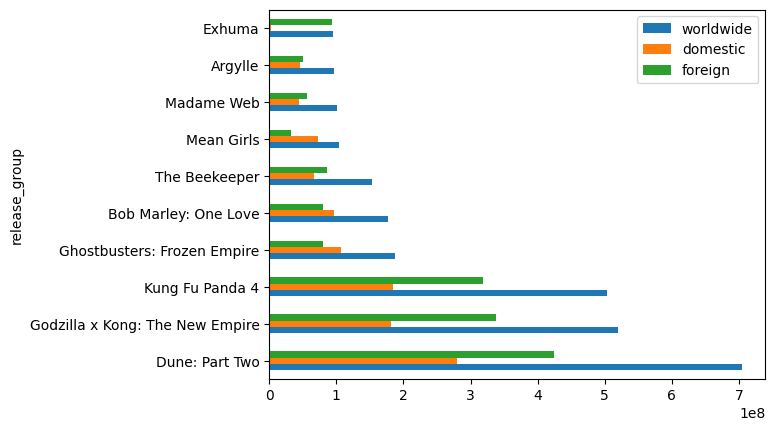

In [17]:
df.head(10).plot(kind='barh')

### Data Cleansing

(please change this markdown with your explanation of what you do for data wrangling)

Cleansing data yang saya lakukan adalah mengubah tipe data penjualan yang sebelumnya bertipe object dan memiliki karakter khusus seperti $, tanda koma (,) dan - (dash) sehingga datanya hanya berupa angka, dengan demikian saya akan mengubah data tersebut menjadi integer yang nantinya akan saya visualisasikan.

### Data Visualization

(please change this markdown with your explanation of what you do for data wrangling)

Saya mencari data 10 Film Populer/terlaris di tahun 2024 dari data penjualan di seluruh dunia (Worldwide), data penjualan Domestic, dan data penjualan Foreign.
Film-film tersebut adalah Dune: Part Two, Godzilla x Kong: The New Empire, Kung Fu Panda 4, Ghostbusters: Frozen Empire, Bob Marley: One Love, The Beekeeper, Mean Girls, Madame Web, Argylle, Exhuma.


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

<Axes: ylabel='release_group'>

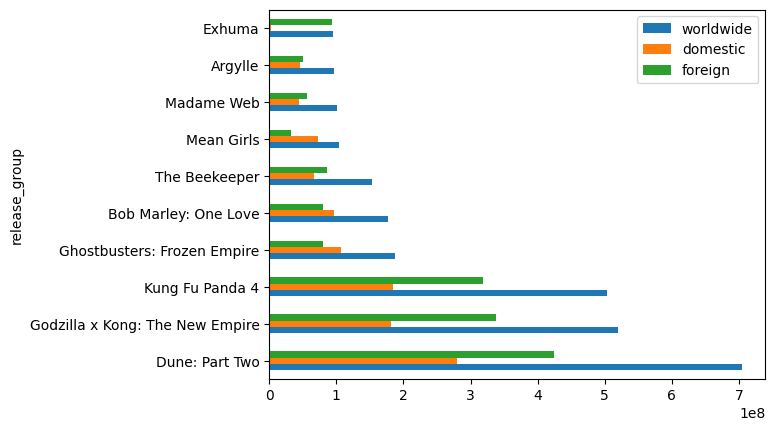

In [18]:
df.head(10).plot(kind='barh')

## Analysis

Analisis: Menganalisis data 10 Film Paling Populer di tahun 2024 dari website Box Office Mojo dengan menggunakan teknik scrapping, data cleansing, sampai akhirnya dapat membuat visualisasi dan dashboard untuk data tersebut. 

Konklusi: Film dengan penjualan tertinggi adalah Dune: Part Two dengan total penjualan dari film tersebut adalah $704,242,968 (Worlwide), $279,742,968 (Domestic) dan $424,500,000 (Foreign).

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.